## Logistic Regression in R A Classification Technique to Predict Credit Card Default

## INTRODUCTION

Logistic regression is one of the statistical techniques in machine learning used to form prediction models. It is one of the most popular classification algorithms mostly used for binary classification problems (problems with two class values, however, some variants may deal with multiple classes as well). It's used for various research and industrial problems. Therefore, it is essential to have a good grasp on logistic regression algorithm. This tutorial is a sneak peek from many of Data Science Dojo’s hands-on exercises from their 5-day [data science bootcamp](https://datasciencedojo.com/data-science-bootcamp/), you will learn how logistic regression fits a dataset to make predictions, as well as when and why to use it.

In short, Logistic Regression is used when the dependent variable(target) is categorical. For example: <br/>
* To predict whether an email is spam (1) or not spam (0) <br/>
* Whether the tumor is malignant (1) or not (0) <br/>

It is named as ‘Logistic Regression’, because it’s underlying technique is quite the same as Linear Regression. There are structural differences in how linear and logistic regression operate. Therefore, linear regression isn't suitable to be used for classification problems. This [link](https://stats.stackexchange.com/questions/22381/why-not-approach-classification-through-regression) answers in details that why linear regression isn't the right approach for classification.

Its name is derived from one of the core function behind its implementation called the logistic function or the sigmoid function. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

![Logistic Function](https://cdn-images-1.medium.com/max/1500/1*sR6PgnEB5HmuRuz62DfWzQ.png)

The hypothesis function of logistic regression can be seen below where the function g(z) is also shown.

![Logistic Regression Hypothesis](https://cdn-images-1.medium.com/max/2000/1*o4Dy1w4n2kDOLA8UEwGC9g.png)

The hypothesis for logistic regression now becomes:

![](https://cdn-images-1.medium.com/max/1000/1*L9a6phB1ZzjRhb-VI3W1YQ.png)

![Hypothesis function](https://cdn-images-1.medium.com/max/1000/1*jStEeKa6l6KgQxbS8iGzrw.png)


Here θ (theta) is a vector of paramters that our model will calculate to fit our classifier.

After calculations from the above equations, the cost function is now as follows:

![](https://cdn-images-1.medium.com/max/1000/1*Capcm4gWSZFZY6Str-wSRQ.png)

Here m is the number of training examples. Like  Linear Regression, we will use gradient descent to minimize our cost function and calculate the vector θ (theta). 

----

This tutorial will follow the format below to provide you hands-on practice with Logistic Regression:

1. Importing Libraries
2. Importing Datasets
3. Exploratory Data Analysis
4. Feature Engineering
5. Pre-processing
6. Model Development
7. Prediction
8. Evaluation

----

## THE SCENARIO

In this tutorial, we will be working with [Default of Credit Card Clients Data Set](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Default%20of%20Credit%20Card%20Clients). This data set has 30000 rows and 24 columns. The data set could be used to estimate the probability of default payment by credit card client using the data provided. These attributes are related to various details about a customer, his past payment information and bill statements. It is hosted in Data Science Dojo's repository. 

Think of yourself as a lead data scientist employed at a large bank. You have been assigned to predict whether a particular customer will default payment next month or not. The result is a an extremely valuable piece of information for the bank to take decisions regarding offering credit to its customer and could massively affect the bank's revenue. Therefore, your task is very critical. You will learn to use logistic regression to solve this problem.

The dataset is a tricky one as it has a mix of categorical and continuous variables. Moreover, You will also get a chance to practice these concepts through short assignments given at the end of a few sub-module. Feel free to change the parameters in the given methods once you have been through the entire notebook.


-----

## 1) Importing Libraries

We'll begin by importing our dependencies that we require. The following dependencies are popularly used for data wrangling operations and visualizations. We would encourage you to have a look at their documentations.

In [2]:
library(knitr)
library(tidyverse)
library(ggplot2)
library(mice)
library(lattice)
library(reshape2)
library(RCurl, quietly = TRUE)
library(DataExplorer)
options(warn=-1)


## 2) Importing Datasets

The dataset is available at Data Science Dojo's repository in the following [link](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Default%20of%20Credit%20Card%20Clients). We'll use head method to view the first few rows.

In [3]:
## Need to fetch the excel file

path <- "https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Default%20of%20Credit%20Card%20Clients/default%20of%20credit%20card%20clients.csv"
data <- read.csv(file = path, header = TRUE)
head(data)

X  X1        X2  X3        X4       X5  X6    X7    X8    X9    ... X15      
1 ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 ... BILL_AMT4
2 1  20000     2   2         1        24  2     2     -1    -1    ... 0        
3 2  120000    2   2         2        26  -1    2     0     0     ... 3272     
4 3  90000     2   2         2        34  0     0     0     0     ... 14331    
5 4  50000     2   2         1        37  0     0     0     0     ... 28314    
6 5  50000     1   2         1        57  -1    0     -1    0     ... 20940    
  X16       X17       X18      X19      X20      X21      X22      X23     
1 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6
2 0         0         0        689      0        0        0        0       
3 3455      3261      0        1000     1000     1000     0        2000    
4 14948     15549     1518     1500     1000     1000     1000     5000    
5 28959     29547     2000     2019     1200     1100     1069     1000    
6 19146     19131     2000     36681    10000    9000     689      679     
  Y                         
1 default payment next month
2 1                         
3 1                         
4 0                         
5 0                         
6 0

Since the header names are in the first row of the dataset, we'll use the code below to first assign the headers to be the one from the first row and then delete the first row from the dataset. This way we will get our desired form.

In [4]:
colnames(data) <- as.character(unlist(data[1,]))
data = data[-1, ]
head(data)

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 ... BILL_AMT4
2 1  20000     2   2         1        24  2     2     -1    -1    ... 0        
3 2  120000    2   2         2        26  -1    2     0     0     ... 3272     
4 3  90000     2   2         2        34  0     0     0     0     ... 14331    
5 4  50000     2   2         1        37  0     0     0     0     ... 28314    
6 5  50000     1   2         1        57  -1    0     -1    0     ... 20940    
7 6  50000     1   1         2        37  0     0     0     0     ... 19394    
  BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6
2 0         0         0        689      0        0        0        0       
3 3455      3261      0        1000     1000     1000     0        2000    
4 14948     15549     1518     1500     1000     1000     1000     5000    
5 28959     29547     2000     2019     1200     1100     1069     1000    
6 19146     19131     2000     36681    10000    9000     689      679     
7 19619     20024     2500     1815     657      1000     1000     800     
  default payment next month
2 1                         
3 1                         
4 0                         
5 0                         
6 0                         
7 0

To avoid any complications ahead, we'll rename our target variable "default payment next month" to a name without spaces using the code below.

In [5]:
colnames(data)[colnames(data)=="default payment next month"] <- "default_payment"
head(data)

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 ... BILL_AMT4
2 1  20000     2   2         1        24  2     2     -1    -1    ... 0        
3 2  120000    2   2         2        26  -1    2     0     0     ... 3272     
4 3  90000     2   2         2        34  0     0     0     0     ... 14331    
5 4  50000     2   2         1        37  0     0     0     0     ... 28314    
6 5  50000     1   2         1        57  -1    0     -1    0     ... 20940    
7 6  50000     1   1         2        37  0     0     0     0     ... 19394    
  BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6
2 0         0         0        689      0        0        0        0       
3 3455      3261      0        1000     1000     1000     0        2000    
4 14948     15549     1518     1500     1000     1000     1000     5000    
5 28959     29547     2000     2019     1200     1100     1069     1000    
6 19146     19131     2000     36681    10000    9000     689      679     
7 19619     20024     2500     1815     657      1000     1000     800     
  default_payment
2 1              
3 1              
4 0              
5 0              
6 0              
7 0

## 3) Exploratory Data Analysis

Data Exploration is one of the most significant portions of the machine learning process. Clean data can ensures a notable increase in accuracy of our model. No matter how powerful our model is, it cannot function well unless the data we provide it has been thoroughly processed. This step will briefly take you through this step and assist you to visualize your data, find relation between variables, deal with missing values and outliers and assist in getting some fundamental understanding of each variable we'll use. Moreover, this step will also enable us to figure out the most important attibutes to feed our model and discard those that have no relevance.

We will start with using the dim function to print out the dimensionality of our dataframe.

In [6]:
dim(data)

[1] 30000    25

The str method will allows us to know the data type of each variable. We'll transform it to numeric data type since it'll be more handy to use for our functions ahead.

In [7]:
str(data)

'data.frame':	30000 obs. of  25 variables:
 $ ID             : Factor w/ 30001 levels "1","10","100",..: 1 11112 22223 23335 24446 25557 26668 27779 28890 2 ...
 $ LIMIT_BAL      : Factor w/ 82 levels "10000","100000",..: 14 5 81 48 48 48 49 2 7 14 ...
 $ SEX            : Factor w/ 3 levels "1","2","SEX": 2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION      : Factor w/ 8 levels "0","1","2","3",..: 3 3 3 3 3 2 2 3 4 4 ...
 $ MARRIAGE       : Factor w/ 5 levels "0","1","2","3",..: 2 3 3 2 2 3 3 3 2 3 ...
 $ AGE            : Factor w/ 57 levels "21","22","23",..: 4 6 14 17 37 17 9 3 8 15 ...
 $ PAY_0          : Factor w/ 12 levels "-1","-2","0",..: 5 1 3 3 1 3 3 3 3 2 ...
 $ PAY_2          : Factor w/ 12 levels "-1","-2","0",..: 5 5 3 3 3 3 3 1 3 2 ...
 $ PAY_3          : Factor w/ 12 levels "-1","-2","0",..: 1 3 3 3 1 3 3 1 5 2 ...
 $ PAY_4          : Factor w/ 12 levels "-1","-2","0",..: 1 3 3 3 3 3 3 3 3 2 ...
 $ PAY_5          : Factor w/ 11 levels "-1","-2","0",..: 2 3 3 3 3 3 3 3 3 1 ...
 $ PA

In [8]:
data[, 1:25] <- sapply(data[, 1:25], as.character)

We have involved an intermediate step by converting our data to character first. We need to use *as.character* before *as.numeric*. This is because factors are stored internally as integers with a table to give the factor level labels. Just using *as.numeric* will only give the internal integer codes.

In [9]:
data[, 1:25] <- sapply(data[, 1:25], as.numeric)
str(data)

'data.frame':	30000 obs. of  25 variables:
 $ ID             : num  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL      : num  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX            : num  2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION      : num  2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE       : num  1 2 2 1 1 2 2 2 1 2 ...
 $ AGE            : num  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0          : num  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2          : num  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3          : num  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4          : num  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5          : num  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6          : num  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1      : num  3913 2682 29239 46990 8617 ...
 $ BILL_AMT2      : num  3102 1725 14027 48233 5670 ...
 $ BILL_AMT3      : num  689 2682 13559 49291 35835 ...
 $ BILL_AMT4      : num  0 3272 14331 28314 20940 ...
 $ BILL_AMT5      : num  0 3455 14948 28959 19146 ...
 $ BILL_AMT6      : nu

When applied to a data frame, the summary() function is essentially applied to each column, and the results for all columns are shown together. For a continuous (numeric) variable like “age”, it returns the 5-number summary showing 5 descriptive statistic as these are numeric values. 

In [10]:
summary(data)

       ID          LIMIT_BAL            SEX          EDUCATION    
 Min.   :    1   Min.   :  10000   Min.   :1.000   Min.   :0.000  
 1st Qu.: 7501   1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15000   Median : 140000   Median :2.000   Median :2.000  
 Mean   :15000   Mean   : 167484   Mean   :1.604   Mean   :1.853  
 3rd Qu.:22500   3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :1000000   Max.   :2.000   Max.   :6.000  
    MARRIAGE          AGE            PAY_0             PAY_2        
 Min.   :0.000   Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.0000   Median : 0.0000  
 Mean   :1.552   Mean   :35.49   Mean   :-0.0167   Mean   :-0.1338  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :79.00   Max.   : 8.0000   Max.   : 8.0000  
     PAY_3             PAY_4             PAY_5  

Using the introduce method, we can get to know the basc information about the dataframe, including the number of missing values in each variable.

In [11]:
introduce(data)

rows  columns discrete_columns continuous_columns all_missing_columns
1 30000 25      0                25                 0                  
  total_missing_values complete_rows total_observations memory_usage
1 0                    30000         750000             6005824

As we can observe, there are no missing values in the dataframe.

The information in summary above gives a sense of the continuous and categorical features in our dataset. However, evaluating these details against the [data description](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Default%20of%20Credit%20Card%20Clients) shows that categorical values such as **EDUCATION** and **MARRIAGE** have categories beyond those given in the data dictionary. We'll find out these extra categories using the value_counts method.

In [12]:
count(data, vars = EDUCATION)

vars n    
1 0       14
2 1    10585
3 2    14030
4 3     4917
5 4      123
6 5      280
7 6       51

The data dictionary defines the following categories for EDUCATION: "Education (1 =   graduate school; 2 = university; 3 = high school; 4 = others)". However, we can also observe 0 along with numbers greater than 4, i.e. 5 and 6. Since we don't have any further details about it, we can assume 0 to be someone with no education experience and 0 along with 5 & 6 can be placed in others along with 4.

In [13]:
count(data, vars = MARRIAGE)

vars n    
1 0       54
2 1    13659
3 2    15964
4 3      323

The data dictionary defines the following categories for MARRIAGE: "Marital status (1 = married; 2 = single; 3 = others)". Since the category 0 hasn't been defined anywhere in the data dictionary, we can incude it in the 'others' category marked as 3.

In [14]:
#replace 0's with NAN, replace others too
data$EDUCATION[data$EDUCATION == 0] <- 4
data$EDUCATION[data$EDUCATION == 5] <- 4
data$EDUCATION[data$EDUCATION == 6] <- 4
data$MARRIAGE[data$MARRIAGE == 0] <- 3

In [15]:
count(data, vars = MARRIAGE)
count(data, vars = EDUCATION)

vars n    
1 1    13659
2 2    15964
3 3      377

vars n    
1 1    10585
2 2    14030
3 3     4917
4 4      468

We'll now move on to multi-variate analysis of our variables and draw a correlation heat map from DataExplorer library. The heatmap will enable us to find out the correlation between each variable. We are more interested in to find out the correlation between our predictor attributes with the target attribute default payment next month. The color scheme depicts the strength of correlation between 2 variables.

This will be a simple way to quickly find out how much an impact a variable has on our final outcome. There are other ways as well to figure this out.

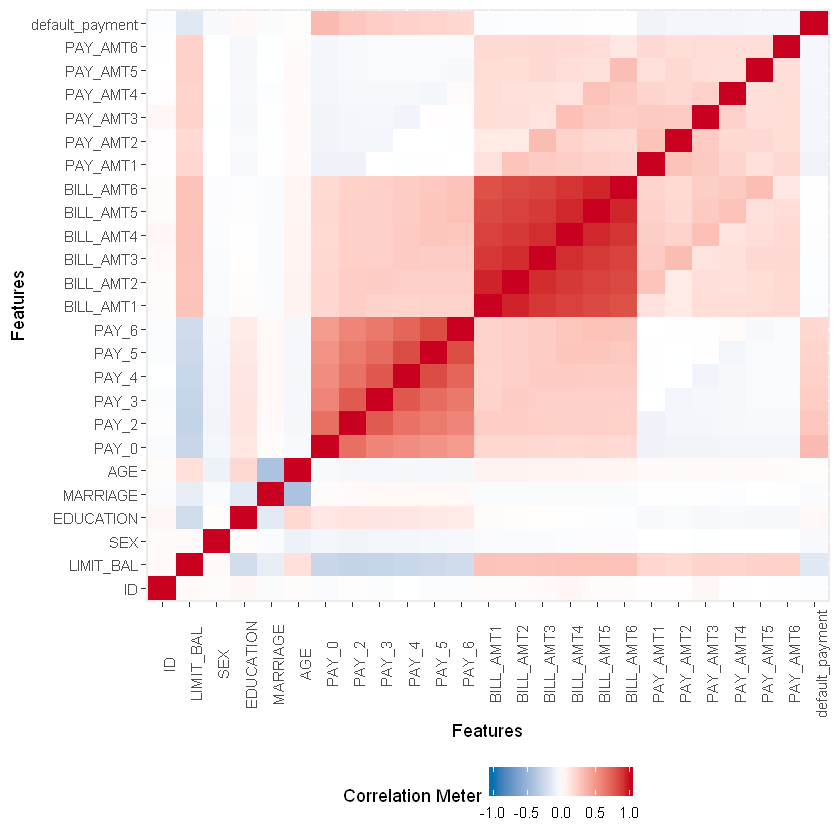

In [16]:
plot_correlation(na.omit(data), maxcat = 5L)

We can observe the week correlation of AGE, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 with our target variable.

Now let's have a univariate analysis of our variables. We'll start with the categorical variables and have a quick check on the frequency of distribution of categories. The code below will allow us to observe the required graphs. We'll first draw distribution for all PAY variables.

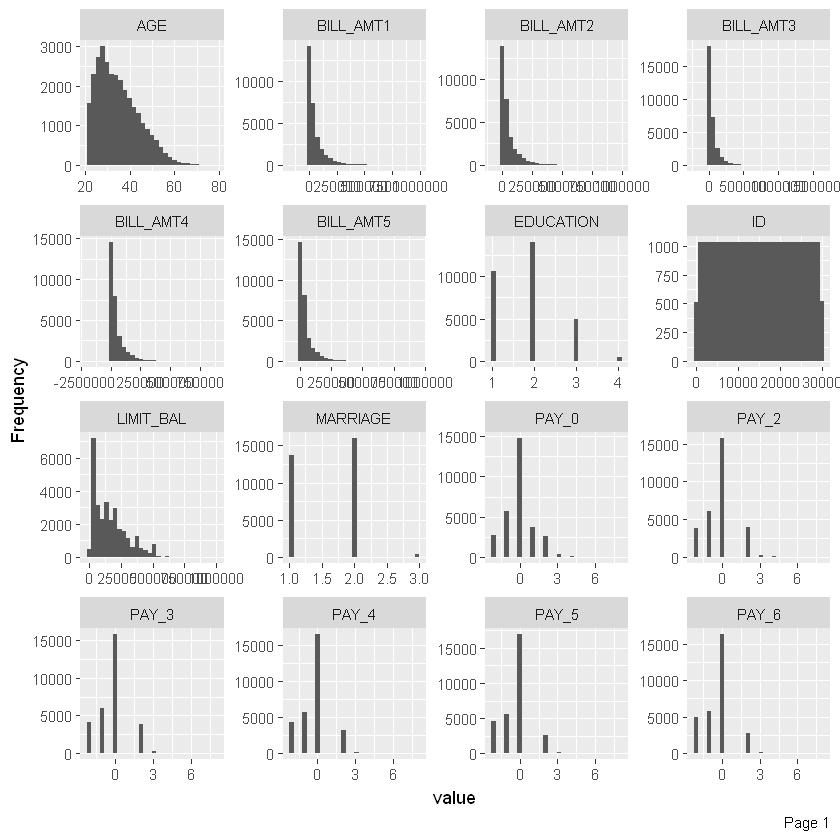

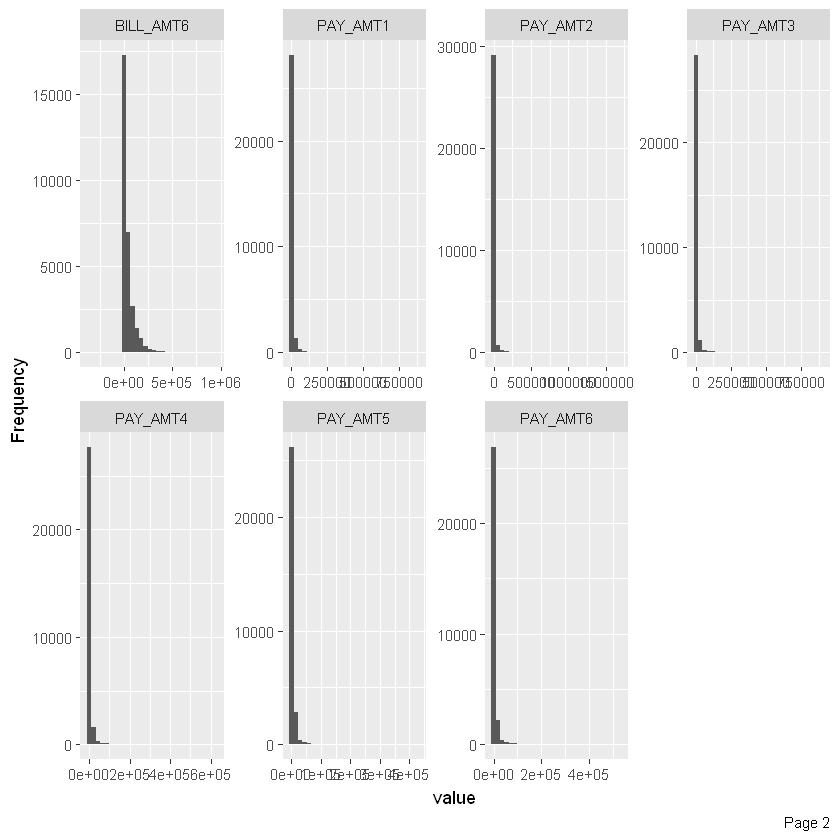

In [17]:
plot_histogram(data)

We can make a few observations from the above histogram. The distribution above shows that all nearly all PAY attributes are rightly skewed.

## 4) Feature Engineering

This step can be more important than the actual model used because a machine learning algorithm only learns from the data we give it, and creating features that are relevant to a task is absolutely crucial.

Analyzing our data above, we've been able to note the extremely week correlation of some variables with the final target variable. The following are the ones which have significantly low correlation values: AGE, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6. 

In [18]:
#deleting columns

data_new <- select(data, -one_of('ID','AGE', 'BILL_AMT2',
       'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'))

head(data_new)

LIMIT_BAL SEX EDUCATION MARRIAGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6
2  20000    2   2         1         2    2     -1    -1    -2    -2   
3 120000    2   2         2        -1    2      0     0     0     2   
4  90000    2   2         2         0    0      0     0     0     0   
5  50000    2   2         1         0    0      0     0     0     0   
6  50000    1   2         1        -1    0     -1     0     0     0   
7  50000    1   1         2         0    0      0     0     0     0   
  BILL_AMT1 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6
2  3913        0       689        0       0        0        0    
3  2682        0      1000     1000    1000        0     2000    
4 29239     1518      1500     1000    1000     1000     5000    
5 46990     2000      2019     1200    1100     1069     1000    
6  8617     2000     36681    10000    9000      689      679    
7 64400     2500      1815      657    1000     1000      800    
  default_payment
2 1              
3 1              
4 0              
5 0              
6 0              
7 0

## 5) Pre-processing

Standardization is a transformation that centers the data by removing the mean value of each feature and then scale it by dividing (non-constant) features by their standard deviation. After standardizing data the mean will be zero and the standard deviation one. It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In the code below, we'll use the scale method transform our dataset using it. 


In [19]:
data_new[, 1:17] <- scale(data_new[, 1:17])

In [20]:
head(data_new)

LIMIT_BAL  SEX        EDUCATION  MARRIAGE   PAY_0       PAY_2     PAY_3     
2 -1.1367012  0.8101472  0.2118664 -1.0687794  1.79453395 1.7823185 -0.6966518
3 -0.3659744  0.8101472  0.2118664  0.8491164 -0.87497656 1.7823185  0.1388625
4 -0.5971924  0.8101472  0.2118664  0.8491164  0.01486028 0.1117342  0.1388625
5 -0.9054832  0.8101472  0.2118664 -1.0687794  0.01486028 0.1117342  0.1388625
6 -0.9054832 -1.2343024  0.2118664 -1.0687794 -0.87497656 0.1117342 -0.6966518
7 -0.9054832 -1.2343024 -1.1313270  0.8491164  0.01486028 0.1117342  0.1388625
  PAY_4      PAY_5      PAY_6      BILL_AMT1   PAY_AMT1   PAY_AMT2   PAY_AMT3  
2 -0.6665876 -1.5300205 -1.4860160 -0.64249036 -0.3419359 -0.2270819 -0.2967963
3  0.1887429  0.2349126  1.9922823 -0.65920776 -0.3419359 -0.2135841 -0.2400006
4  0.1887429  0.2349126  0.2531332 -0.29855468 -0.2502874 -0.1918835 -0.2400006
5  0.1887429  0.2349126  0.2531332 -0.05749007 -0.2211869 -0.1693583 -0.2286415
6  0.1887429  0.2349126  0.2531332 -0.57860845 -0.2211869  1.3350119  0.2711608
7  0.1887429  0.2349126  0.2531332  0.17894364 -0.1909996 -0.1782122 -0.2594815
  PAY_AMT4   PAY_AMT5   PAY_AMT6    default_payment
2 -0.3080574 -0.3141309 -0.29337717 1              
3 -0.2442256 -0.3141309 -0.18087519 1              
4 -0.2442256 -0.2486786 -0.01212223 0              
5 -0.2378424 -0.2441624 -0.23712618 0              
6  0.2664292 -0.2690343 -0.25518275 0              
7 -0.2442256 -0.2486786 -0.24837638 0

The next task we'll do is to split the data for training and testing as we'll use our test data to evaluate our model. We will now split our dataset into train and test. We'll change it to 0.3. Therefore, 30% of the dataset is reserved for testing while the remaining for training. By default, the dataset will also be shuffled before splitting.

In [21]:
#create a list of random number ranging from 1 to number of rows from actual data 
#and 70% of the data into training data  

data2 = sort(sample(nrow(data_new), nrow(data_new)*.7))

#creating training data set by selecting the output row values
train <- data_new[data2,]

#creating test data set by not selecting the output row values
test <- data_new[-data2,]

Let us print the dimensions of all these variables using the dim method. You can notice the 70-30% split.

In [22]:
dim(train)
dim(test)

[1] 21000    18

[1] 9000   18

## 6) Model Development

We will now move on to our most important step of developing our logistic regression model. We have already fetched our machine learning model in the beginning. Now with a few lines of code we'll first create a logistic regression model which as has been imported from scikit learn's linear model package to our variable  named *model*. 

Followed by this, we'll train our model using the fit method with X_train and y_train that contain 70% of our dataset. This will be a  binary classification model.

In [23]:
## fit a logistic regression model with the training dataset
log.model <- glm(default_payment ~., data = train, family = binomial(link = "logit"))

In [24]:
summary(log.model)


Call:
glm(formula = default_payment ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1171  -0.6998  -0.5473  -0.2946   3.4915  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.465097   0.019825 -73.900  < 2e-16 ***
LIMIT_BAL   -0.083475   0.023905  -3.492 0.000480 ***
SEX         -0.082986   0.017717  -4.684 2.81e-06 ***
EDUCATION   -0.059851   0.019178  -3.121 0.001803 ** 
MARRIAGE    -0.107322   0.018350  -5.849 4.95e-09 ***
PAY_0        0.661918   0.023605  28.041  < 2e-16 ***
PAY_2        0.069704   0.028842   2.417 0.015660 *  
PAY_3        0.090691   0.031982   2.836 0.004573 ** 
PAY_4        0.074336   0.034612   2.148 0.031738 *  
PAY_5        0.018469   0.036430   0.507 0.612178    
PAY_6        0.006314   0.030235   0.209 0.834584    
BILL_AMT1   -0.123582   0.023558  -5.246 1.56e-07 ***
PAY_AMT1    -0.136745   0.037549  -3.642 0.000271 ***
PAY_AMT2    -0.2466

## 7) Prediction

Below we'll use the predict method to find out the predictions made by our Logistic Regression method. We will first store the predicted results in our y_pred variable and print our the first 10 rows of our test data set. Following this we will print the predicted values of the corresponding rows and the original labels that were stored in y_test for comparision.

In [25]:
test[1:10,]

LIMIT_BAL  SEX        EDUCATION  MARRIAGE   PAY_0       PAY_2     
5  -0.9054832  0.8101472  0.2118664 -1.0687794  0.01486028  0.1117342
10 -0.2118290  0.8101472  1.5550597 -1.0687794  0.01486028  0.1117342
11 -1.1367012 -1.2343024  1.5550597  0.8491164 -1.76481340 -1.5588500
12  0.2506070  0.8101472  1.5550597  0.8491164  0.01486028  0.1117342
14  3.5647323  0.8101472  0.2118664  0.8491164 -0.87497656  0.1117342
15 -0.7513378 -1.2343024  0.2118664  0.8491164  0.90469711  1.7823185
19  1.1754792 -1.2343024 -1.1313270 -1.0687794  0.01486028  0.1117342
22 -0.2889017  0.8101472  1.5550597  0.8491164  0.01486028  0.1117342
23 -0.3659744  0.8101472  0.2118664 -1.0687794 -0.87497656 -0.7235579
24 -0.7513378  0.8101472  0.2118664  0.8491164  1.79453395  0.1117342
   PAY_3      PAY_4      PAY_5      PAY_6      BILL_AMT1   PAY_AMT1  
5   0.1388625  0.1887429  0.2349126  0.2531332 -0.05749007 -0.2211869
10  1.8098911  0.1887429  0.2349126  0.2531332 -0.54237610 -0.1409492
11 -1.5321662 -1.5219182 -0.6475540 -0.6164414 -0.69563023 -0.3419359
12  1.8098911  0.1887429  0.2349126 -0.6164414 -0.54525513 -0.2027123
14 -0.6966518 -0.6665876 -0.6475540 -0.6164414 -0.53080565 -0.2815614
15  1.8098911  0.1887429  0.2349126  1.9922823  0.19798328 -0.1487375
19  0.1388625 -0.6665876 -0.6475540 -0.6164414  2.74407969  0.2834233
22  0.1388625  0.1887429  0.2349126 -0.6164414 -0.17471556 -0.1608124
23 -0.6966518 -0.6665876 -0.6475540 -0.6164414 -0.69133885 -0.3228576
24  0.1388625  1.8994041  1.9998457  1.9922823 -0.13765482 -0.2207643
   PAY_AMT2    PAY_AMT3    PAY_AMT4    PAY_AMT5    PAY_AMT6   default_payment
5  -0.16935834 -0.22864147 -0.23784239 -0.24416239 -0.2371262 0              
10 -0.25698524 -0.27226058 -0.24422557 -0.24867860 -0.2371262 0              
11 -0.25698524 -0.29679633  0.52220348 -0.24069342 -0.2933772 0              
12 -0.25646442 -0.29395654 -0.28890787 -0.06947024 -0.2896646 0              
14  0.02512216  0.07237583  0.10684961 -0.12628283 -0.2933772 0              
15 -0.25698524 -0.12640918 -0.11656187 -0.21595246 -0.2933772 1              
19  0.17702615  4.01627042  0.96857963 12.48827039  2.5191722 0              
22 -0.19027769 -0.24000061 -0.18039372 -0.25326026  1.6058812 0              
23 -0.24327048 -0.29679633 -0.26771570 -0.29344796 -0.2933772 1              
24 -0.10152236 -0.29679633 -0.07819893 -0.31413088 -0.1910004 1

In [26]:
## to predict using logistic regression model, probablilities obtained
log.predictions <- predict(log.model, test, type="response")

## Look at probability output
head(log.predictions, 10)

5         10         11         12         14         15         19 
0.23612246 0.25187069 0.05658566 0.20761155 0.07395296 0.40420345 0.04726426 
        22         23         24 
0.17359301 0.12924318 0.48518877

Below we are going to assign our labels with decision rule that if the prediction is greater than 0.5, assign it 1 else 0.

In [27]:
log.prediction.rd <- ifelse(log.predictions > 0.5, 1, 0)
head(log.prediction.rd, 10)

5 10 11 12 14 15 19 22 23 24 
 0  0  0  0  0  0  0  0  0  0

## 8) Evaluation

We'll now discuss a few evaluation metrics to measure the performance of our machine learning model here. This part has significant relevance since it will allow us to understand the most important characteristics that led to our model development. 

We will output the confusion matrix. It is a handy presentation of the accuracy of a model with two or more classes.

The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.

According to an [article](http://www2.cs.uregina.ca/~dbd/cs831/notes/confusion_matrix/confusion_matrix.html) the entries in the confusion matrix have the following meaning in the context of our study:

[[a  b]<br/>
 [c  d]]

* a is the number of correct predictions that an instance is negative,
* b is the number of incorrect predictions that an instance is positive,
* c is the number of incorrect of predictions that an instance is negative, and
* d is the number of correct predictions that an instance is positive.


In [28]:
table(log.prediction.rd, test[,18])

                 
log.prediction.rd    0    1
                0 6832 1517
                1  170  481

We'll write a simple function to print the accuracy below

In [29]:
accuracy <- table(log.prediction.rd, test[,18])
sum(diag(accuracy))/sum(accuracy)

[1] 0.8125556

## Conclusion

This tutorial has given you a brief and concise overview of Logistic Regression algorithm and all the steps involved in acheiving better results from our model. This notebook has also highlighted a few methods related to Exploratory Data Analysis, Pre-processing and Evaluation, however, there are several other methods that we would encourage to explore on our [blog](https://blog.datasciencedojo.com/) or [video tutorials](https://tutorials.datasciencedojo.com/). 

If you want to take a deeper dive into the several data science techniques. Join our 5-day hands-on [data science bootcamp](https://datasciencedojo.com/data-science-bootcamp/) preferred by working professionals, we cover the following topics: 
* Fundamentals of Data Mining <br/>
* Machine Learning Fundamentals <br/>
* Introduction to R <br/>
* Introduction to Azure Machine Learning Studio <br/>
* Data Exploration, Visualization, and Feature Engineering <br/>
* Decision Tree Learning <br/>
* Ensemble Methods: Bagging, Boosting, and Random Forest <br/>
* Regression: Cost Functions, Gradient Descent, Regularization <br/>
* Unsupervised Learning <br/>
* Recommendation Systems <br/>
* Metrics and Methods for Evaluating Predictive Models <br/>
* Introduction to Online Experimentation and A/B Testing <br/>
* Fundamentals of Big Data Engineering <br/>
* Hadoop and Hive <br/>
* Message Queues and Real-time Analytics <br/>
* NoSQL Databases and HBase <br/>
* Hack Project: Creating a Real-time IoT Pipeline <br/>
* Naive Bayes <br/>
* Logistic Regression <br/>
* Times Series Forecasting 

About The Author
Rahim Rasool is an Associate Data Scientist at Data Science Dojo (DSD) where he helps create learning material for DSD’s [data science bootcamp](https://datasciencedojo.com/data-science-bootcamp/). He holds a bachelor’s in electrical engineering from National University of Sciences and Technology. He possesses great interest in machine learning, astronomy and history.